## Importing the dependencies:

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [102]:
import pickle

## Data Collection and Processing:

In [103]:
df= pd.read_csv('Rainfall.csv')

In [104]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [105]:
df.shape

(366, 12)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [107]:
# Remove extra space in each cols

df.columns= df.columns.str.strip()

In [108]:
# Remove the unnecessary columns

df= df.drop(columns=['day'])

In [109]:
# Checking no. of missing values in each column

df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [110]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [111]:
# Handling missing values

df['winddirection']= df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed']= df['windspeed'].fillna(df['windspeed'].median())

In [112]:
# Checking no. of missing values in each column

df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [113]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [114]:
# Converting Yes and No to 1 and 0 respectively

df['rainfall']= df['rainfall'].map({'yes': 1, 'no': 0})

In [115]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [116]:
df['rainfall'].unique()

array([1, 0], dtype=int64)

## Exploratory Data Analysis (EDA):

In [117]:
# Setting plot style for each plot

sns.set(style='whitegrid')

In [118]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


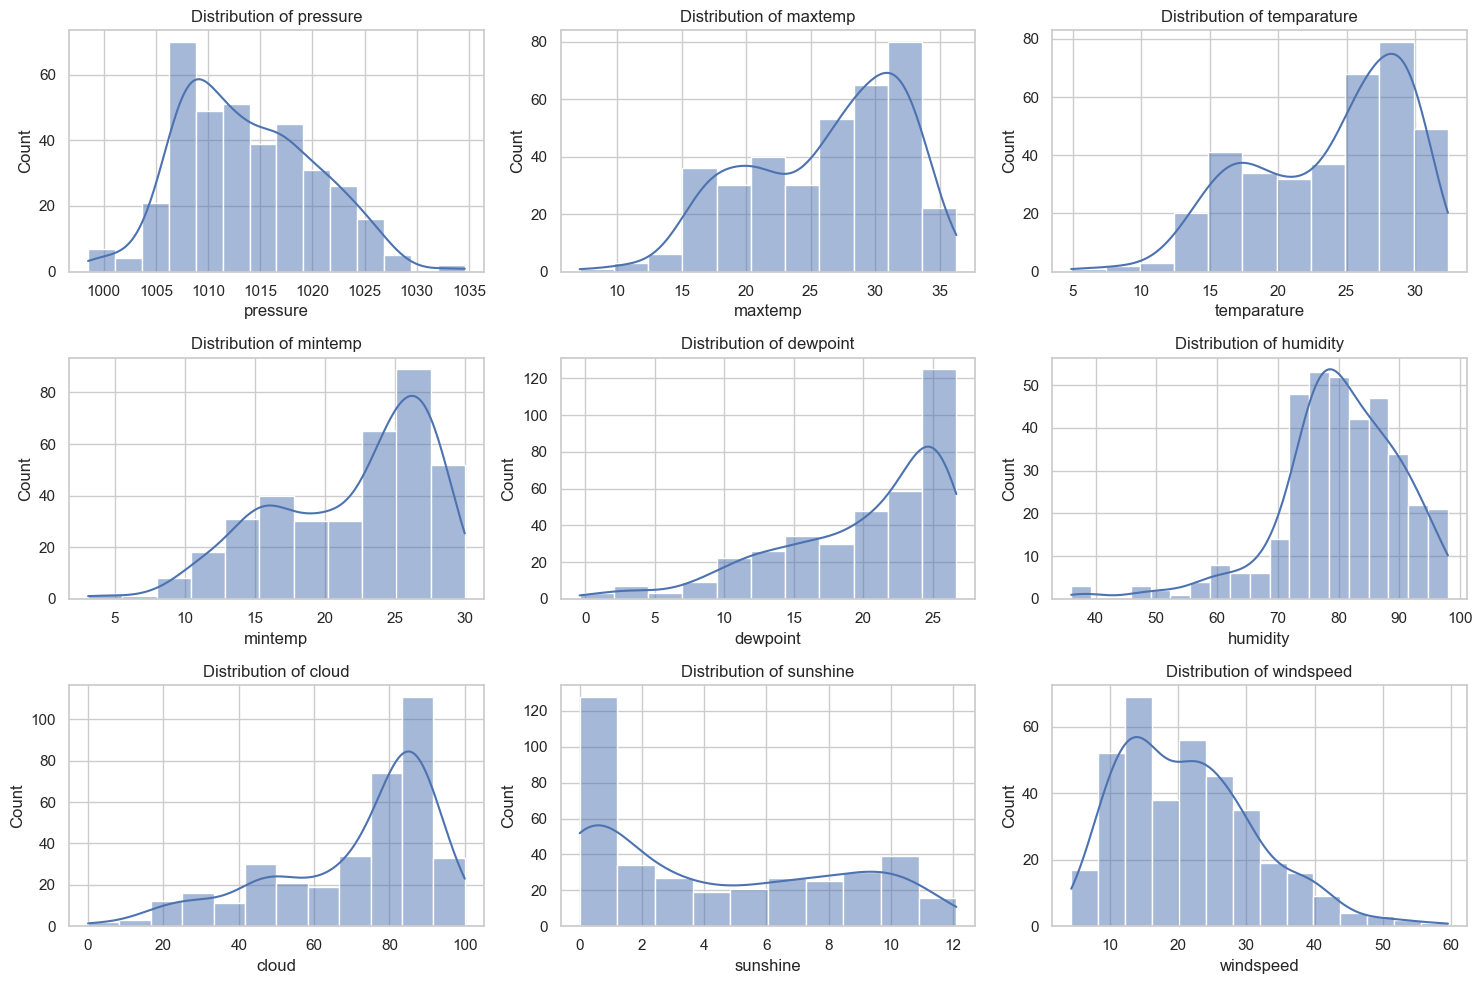

In [119]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

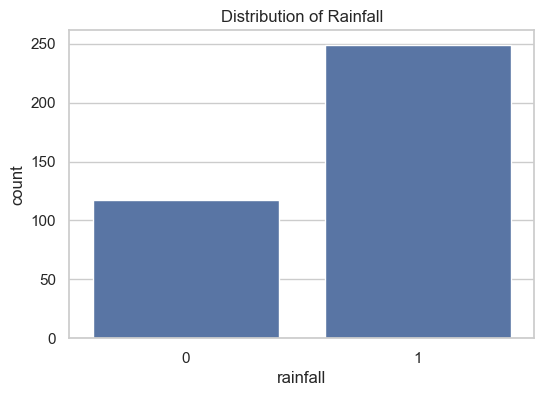

In [120]:
plt.figure(figsize=(6,4))

sns.countplot(x='rainfall', data=df)
plt.title('Distribution of Rainfall')
plt.show()

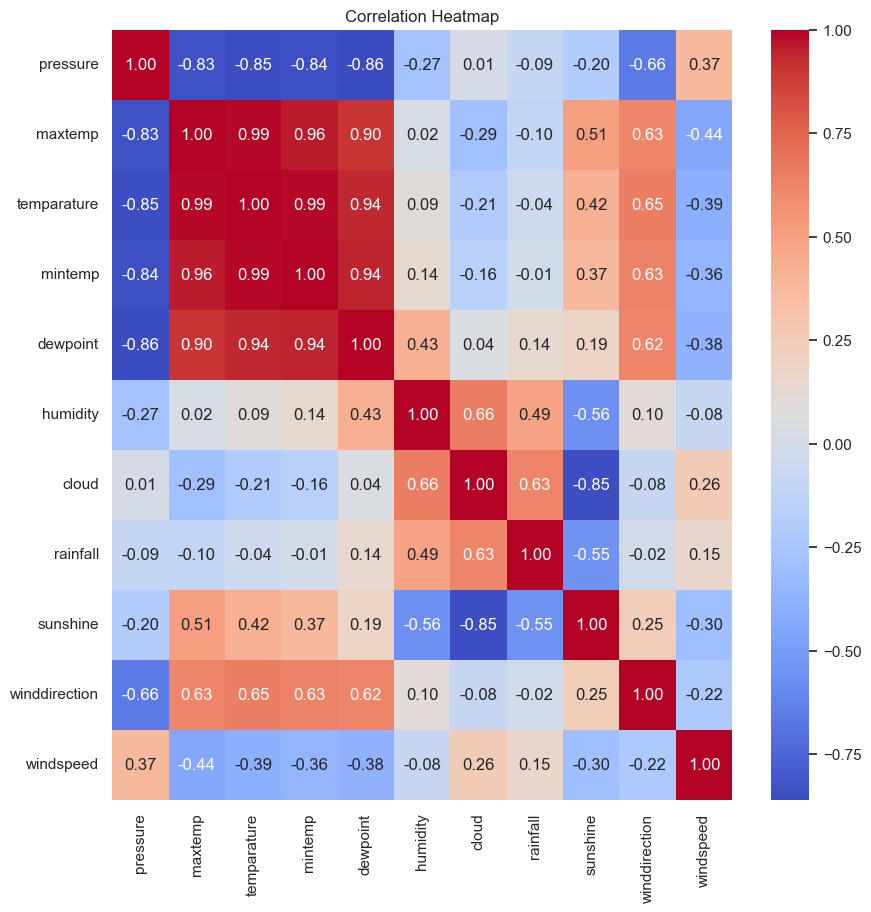

In [121]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

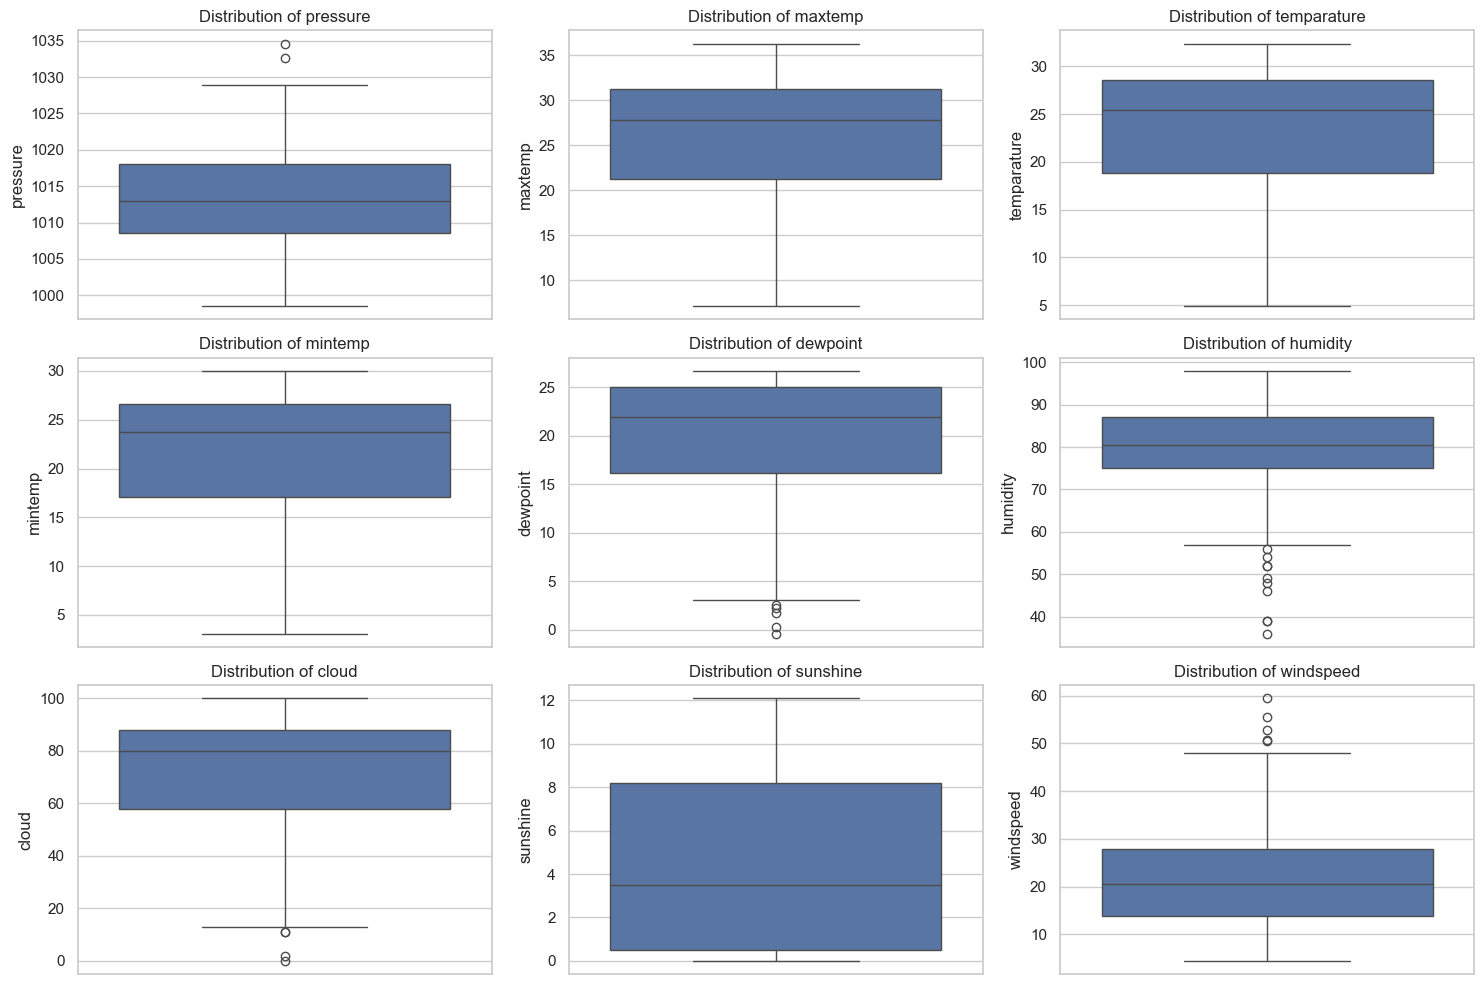

In [122]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'windspeed'], 1):
    
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

## Data Preprocessing:

In [123]:
# Drop highly correlated columns

df= df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [124]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [125]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [126]:
# Separate majority and minority class

df_majority= df[df['rainfall']==1]
df_minority= df[df['rainfall']==0]

In [127]:
print(df.shape)
print(df_majority.shape)
print(df_minority.shape)

(366, 8)
(249, 8)
(117, 8)


In [128]:
# Downsample majority class to match minority count

df_majority_downsampled= resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [129]:
df_majority_downsampled.shape

(117, 8)

In [130]:
df_downsampled= pd.concat([df_majority_downsampled, df_minority])

In [131]:
df_downsampled.shape

(234, 8)

In [132]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [133]:
# Shuffling the final dataframe

df_downsampled= df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [134]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [135]:
# Train- test data split

X_train, X_test, y_train, y_test= train_test_split(
    df_downsampled.drop(columns=['rainfall']), df_downsampled['rainfall'], test_size=0.2, random_state=42
)

In [136]:
X_train.head()

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
117,1024.4,10.1,61,19,10.7,40.0,16.9
155,1024.1,10.0,65,58,5.6,60.0,26.9
148,1012.8,18.0,97,95,0.6,40.0,22.0
158,1014.9,18.2,91,76,0.0,40.0,13.8
231,1020.6,14.7,91,88,0.3,50.0,24.4


In [137]:
y_train.head()

117    0
155    0
148    1
158    1
231    1
Name: rainfall, dtype: int64

## Model Training:

In [138]:
random_forest= RandomForestClassifier(random_state=42)

param_grid_rf= {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [139]:
# Hyperparameter tuning using GridSearchCV

grid_search_rf= GridSearchCV(estimator=random_forest, param_grid= param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [140]:
best_rf_model= grid_search_rf.best_estimator_

print("Best parameters for Random Forest is: ")
print(grid_search_rf.best_params_)

Best parameters for Random Forest is: 
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


## Model Evaluation:

In [141]:
cv_score= cross_val_score(best_rf_model, X_train, y_train, cv=5)

print("Cross validation scores: ", cv_score)
print("Mean cross validation scores: ", np.mean(cv_score))

Cross validation scores:  [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean cross validation scores:  0.818918918918919


In [142]:
# Test set performance

y_pred= best_rf_model.predict(X_test)

print("Test set accuracy: ", np.round(accuracy_score(y_test, y_pred),2))
print("\n")
print("Test set Confusion Matrix:\n ", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification report: \n", classification_report(y_test, y_pred))

Test set accuracy:  0.74


Test set Confusion Matrix:
  [[17  7]
 [ 5 18]]


Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



## Prediction on Unknown Data:

In [143]:
df_downsampled.sample()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
119,1006.3,25.1,89,85,1,3.1,190.0,12.6


In [144]:
input_data= (1016.1, 22.0, 80, 82, 6.5, 70.0, 28.3)
input_df= pd.DataFrame([input_data], columns=['pressure','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])

prediction= best_rf_model.predict(input_df)

In [145]:
if prediction[0] == 1:
    print("Prediction result: Rainfall")
else:
    print("Prediction result: No Rainfall")

Prediction result: Rainfall


In [146]:
# Save model and feature names to Pickle file

model_data= {
    "Model": best_rf_model, 
    "Features_name": df.drop(columns=['rainfall']).columns.tolist()
}

with open("rainfall_prediction_model.pkl", "wb") as file:
    pickle.dump(model_data, file)

## Load the saved model file and make a prediction:

In [147]:
import pickle 
import pandas as pd

In [148]:
# Load the trained model and feature names from pickle file
with open("rainfall_prediction_model.pkl", "rb") as file:
    model_data= pickle.load(file)

In [149]:
print(model_data.keys())

dict_keys(['Model', 'Features_name'])


In [150]:
model = model_data['Model']
feature_names = model_data['Features_name']

In [151]:
input_data= (1016.1, 22.0, 80, 82, 6.5, 70.0, 28.3)
input_df= pd.DataFrame([input_data], columns=feature_names)

prediction= best_rf_model.predict(input_df)

In [152]:
print(prediction)

[1]
